<a href="https://colab.research.google.com/github/Bibirara/Python-learning-stuff/blob/main/Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quantecon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 2.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import quantecon as qe
import numpy as np
import networkx as nx
from matplotlib import cm
import matplotlib as mpl
P = np.array([[0.68, 0.12, 0.20],
              [0.50, 0.24, 0.26],
              [0.36, 0.18, 0.46]])
P_power = np.linalg.matrix_power(P, 2)
P_power

array([[0.5944, 0.1464, 0.2592],
       [0.5536, 0.1644, 0.282 ],
       [0.5004, 0.1692, 0.3304]])

In [ ]:
ψ_star_p = P_power[2]
ψ_star_p

array([0.5004, 0.1692, 0.3304])

In [ ]:
ts_length = 10
num_distributions = 25
plot_distribution(P, ts_length, num_distributions)

NameError: name 'plot_distribution' is not defined

In [5]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
P @ P

array([[0.947046, 0.050721, 0.002233],
       [0.253605, 0.648605, 0.09779 ],
       [0.07366 , 0.64516 , 0.28118 ]])

In [6]:
def iterate_ψ(ψ_0, P, ts_length):
    n = len(P)
    ψ_t = np.empty((ts_length, n))
    ψ = ψ_0
    for t in range(ts_length):
        ψ_t[t] = ψ
        ψ = ψ @ P
    return np.array(ψ_t)

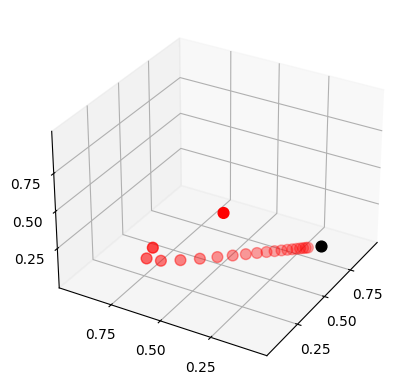

In [7]:
ψ_0 = (0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

ψ_t = iterate_ψ(ψ_0, P, 20)

ax.scatter(ψ_t[:,0], ψ_t[:,1], ψ_t[:,2], c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()

In [11]:
def generate_initial_values(num_distributions):
    n = len(P)
    ψ_0s = np.empty((num_distributions, n))

    for i in range(num_distributions):
        draws = np.random.randint(1, 10_000_000, size=n)

        # Scale them so that they add up into 1
        ψ_0s[i,:] = np.array(draws/sum(draws))

    return ψ_0s

In [12]:
def plot_distribution(P, ts_length, num_distributions):

    # Get parameters of transition matrix
    n = len(P)
    mc = qe.MarkovChain(P)
    ψ_star = mc.stationary_distributions[0]

    ## Draw the plot
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=[11, 5])
    plt.subplots_adjust(wspace=0.35)

    ψ_0s = generate_initial_values(num_distributions)

    # Get the path for each starting value
    for ψ_0 in ψ_0s:
        ψ_t = iterate_ψ(ψ_0, P, ts_length)

        # Obtain and plot distributions at each state
        for i in range(n):
            axes[i].plot(range(0, ts_length), ψ_t[:,i], alpha=0.3)

    # Add labels
    for i in range(n):
        axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black',
                        label = fr'$\psi^*({i})$')
        axes[i].set_xlabel('t')
        axes[i].set_ylabel(fr'$\psi_t({i})$')
        axes[i].legend()

    plt.show()

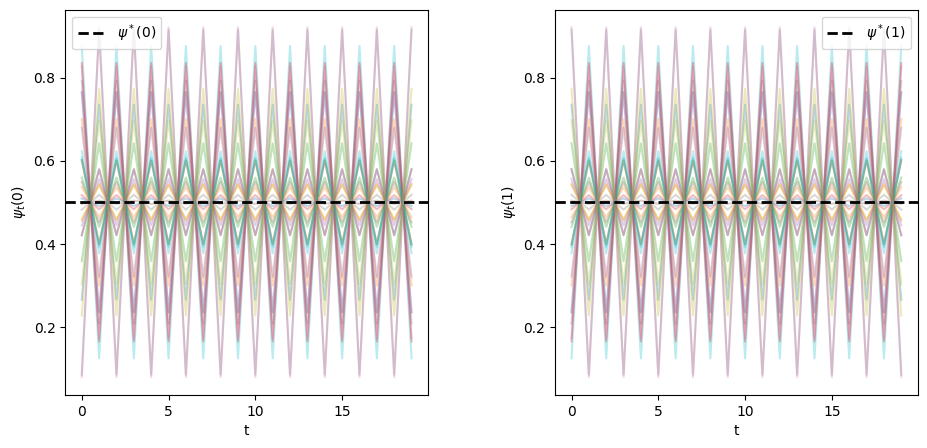

In [15]:
P = np.array([[0, 1],
              [1, 0]])

ts_length = 20
num_distributions = 30

plot_distribution(P, ts_length, num_distributions)

In [21]:
P = np.array([[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
              [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
              [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
              [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
              [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
              [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]])

np.linalg.matrix_power(P,3000)


array([[0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725],
       [0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725],
       [0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725],
       [0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725],
       [0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725],
       [0.60004022, 0.1080214 , 0.18093246, 0.04709699, 0.03768168,
        0.02622725]])

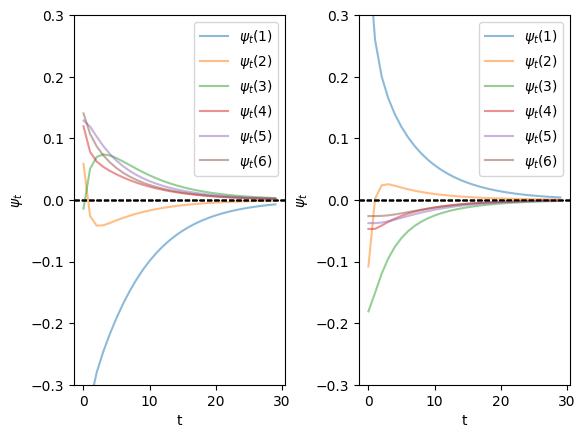

In [22]:
ts_length = 30
num_distributions = 20
nodes = ['DG', 'DC', 'NG', 'NC', 'AG', 'AC']

# Get parameters of transition matrix
n = len(P)
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_0 = np.array([[1/6 for i in range(6)],
                [0 if i != 0 else 1 for i in range(6)]])
## Draw the plot
fig, axes = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.35)
for idx in range(2):
    ψ_t = iterate_ψ(ψ_0[idx], P, ts_length)
    for i in range(n):
        axes[idx].plot(ψ_t[:, i] - ψ_star[i], alpha=0.5, label=fr'$\psi_t({i+1})$')
        axes[idx].set_ylim([-0.3, 0.3])
        axes[idx].set_xlabel('t')
        axes[idx].set_ylabel(fr'$\psi_t$')
        axes[idx].legend()
        axes[idx].axhline(0, linestyle='dashed', lw=1, color = 'black')

plt.show()